## HW 1

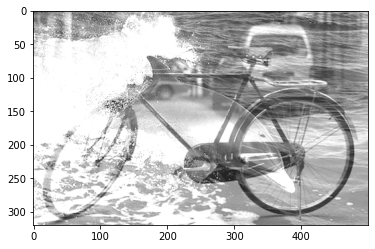

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Blend two images
def blend(a: np.array, b: np.array, alpha: float) -> np.array:
    """ Blends to images using a weight factor.
    Args:
        a (numpy.array): Image A.
        b (numpy.array): Image B.
        alpha (float): Weight factor.

    Returns:
        numpy.array: Blended Image.
    """
    a = a.astype(np.uint16) # treat uint8 underflow and overflow
    b = b.astype(np.uint16)
    result = a + (b*alpha)
    result[result > 255] = 255
    result[result < 0] = 0
    result = result.astype(np.uint8)
    return result / 255.

dolphin = cv2.imread("images/dolphin.png")
bicycle = cv2.imread("images/bicycle.png")

result = blend(dolphin, bicycle, 0.75)
plt.imshow(result)

## HW 1.2

(258, 320, 3)


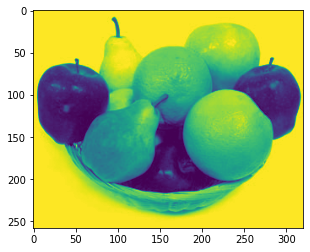

In [20]:
img = cv2.imread('images/fruit.png')
plt.imshow(img)

print(img.shape)

plt.imshow(img[:,:,0])
plt.imshow(img[:,:,1])

cv2.waitKey(0)

# HW 2

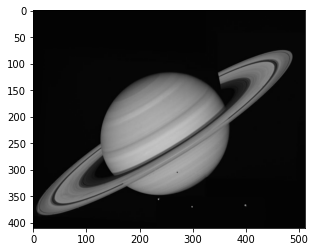

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Apply a Gaussian filter to remove noise
img = cv2.imread('images/saturn.png')
plt.imshow(img)

In [50]:
noise = np.random.choice([0, 255], size=img.shape, p=[0.95,0.05]).astype(np.uint8)

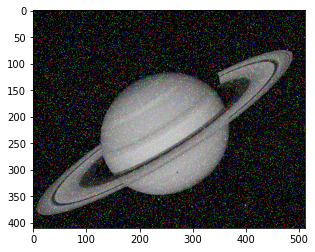

In [51]:
noise_img = cv2.add(img, noise)
plt.imshow(noise_img)

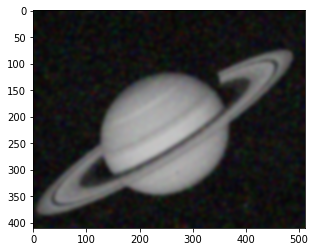

In [52]:
blur = cv2.GaussianBlur(noise_img, (19,19), 0)
plt.imshow(blur)

# HW 3

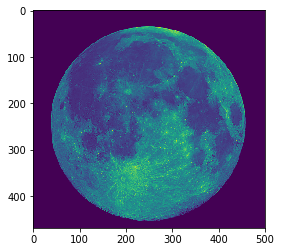

In [19]:
import cv2
import numpy as np


# Helper function
def imnoise(img_in: np.array, method: str, dens):

    if method == 'salt & pepper':
        img_out = np.copy(img_in)
        r, c = img_in.shape
        x = np.random.rand(r, c)
        ids = x < dens / 2.
        img_out[ids] = 0
        ids = dens / 2. <= x
        ids &= x < dens
        img_out[ids] = 255

        return img_out

    else:
        print("Method {} not yet implemented.".format(method))
        exit()

# Apply a median filter

# Read an image
img = cv2.imread('images/moon.png', 0)
plt.imshow(img)

In [ ]:
img_salt_pepper = imnoise(img, 'salt & pepper', 0.1)
plt.imshow(img_salt_pepper)

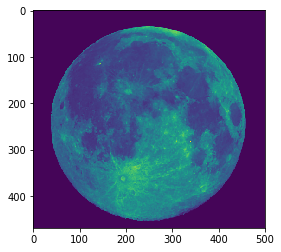

In [39]:
img_blur = cv2.medianBlur(img_salt_pepper, 3)
plt.imshow(img_blur)

# HW 3.2

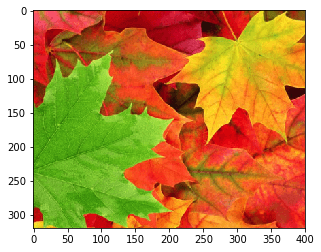

In [66]:
import cv2

# Load an image
img = cv2.imread('images/fall-leaves.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

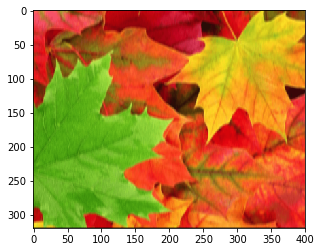

In [67]:
# TODO: Create a Gaussian filter. Use cv2.getGaussianKernel.
gaus_filter = cv2.getGaussianKernel(5, 5)
# TODO: Apply it, specifying an edge parameter (try different parameters). Use cv2.filter2D.
edges = cv2.filter2D(img, -1, gaus_filter, borderType=cv2.BORDER_CONSTANT)
plt.imshow(edges)

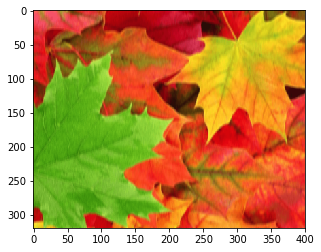

In [68]:
edges = cv2.filter2D(img, -1, gaus_filter, borderType=cv2.BORDER_REPLICATE)
plt.imshow(edges)

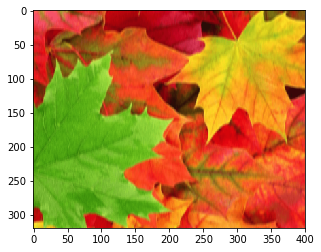

In [69]:
edges = cv2.filter2D(img, -1, gaus_filter, borderType=cv2.BORDER_REFLECT)
plt.imshow(edges)

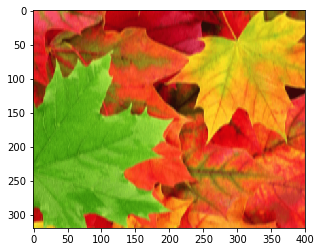

In [73]:
edges = cv2.filter2D(img, -1, gaus_filter, borderType=cv2.BORDER_REFLECT_101)
plt.imshow(edges)

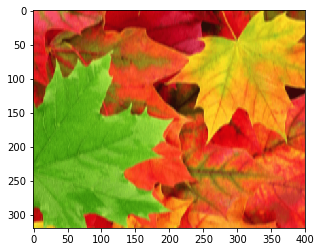

In [75]:
edges = cv2.filter2D(img, -1, gaus_filter, borderType=cv2.BORDER_REFLECT101)
plt.imshow(edges)

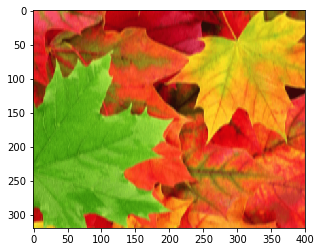

In [76]:
edges = cv2.filter2D(img, -1, gaus_filter, borderType=cv2.BORDER_DEFAULT)
plt.imshow(edges)

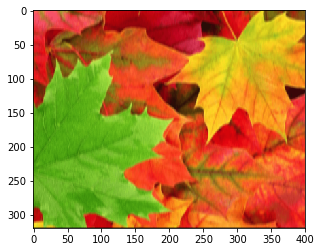

In [77]:
edges = cv2.filter2D(img, -1, gaus_filter, borderType=cv2.BORDER_ISOLATED)
plt.imshow(edges)

# HW 4.1

In [94]:
import numpy as np
import scipy.signal as sp


def find_template_1D(t: np.array, s: np.array) -> int:
    # Locate template t in signal s and return index. Use scipy.signal.correlate2d
    corr = sp.correlate2d(s, t)
    return np.argmax(corr) - t.shape[1] + 1

s = np.array([[-1, 0, 0, 5, 1, 1, 0, 0, -1, -7, 2, 1, 0, 0, -1]])
t = np.array([[-1, -7, 2]])

print("Signal: \n {} \n {}".format(np.array(range(s.shape[1])), s[0]))
print("Template: \n {} \n {}".format(np.array(range(t.shape[1])), t[0]))

index = find_template_1D(t, s)
print(f"Index: s[0, {index}:{index+t.shape[1]}]")

Signal: 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] 
 [-1  0  0  5  1  1  0  0 -1 -7  2  1  0  0 -1]
Template: 
 [0 1 2] 
 [-1 -7  2]
Index: s[0, 8:11]


# HW 4.2

Y: 74, X: 149


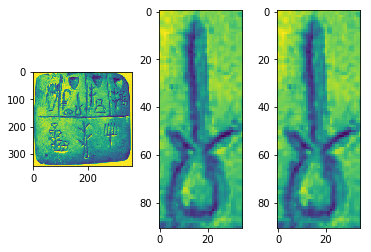

In [119]:
import cv2
import numpy as np
import scipy.signal as sp


# Find template 2D
def find_template_2D(template: np.array, img: np.array) -> tuple:
    # Find template in img and return [y x] location. Make sure this location is the top-left corner of the match.
    corr = sp.correlate2d(img, template, mode='same')
    y, x = np.unravel_index(np.argmax(corr), corr.shape)
    return y - (template.shape[0] // 2), x - (template.shape[1] // 2)
    
fig, ax = plt.subplots(1,3)
tablet = cv2.imread('images/tablet.png', 0)
ax[0].imshow(tablet)

glyph = tablet[74:165, 149:184]
ax[1].imshow(glyph)

tablet_2 = 1. * tablet - np.mean(tablet)
glyph_2 = 1. * glyph - np.mean(glyph)

y, x = find_template_2D(glyph_2, tablet_2)
ax[2].imshow(tablet_2[y:y+glyph_2.shape[0], x:x+glyph_2.shape[1]])
print("Y: {}, X: {}".format(y, x))

# HW 5

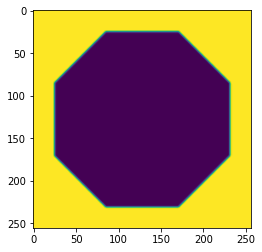

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def normalize(img_in: np.array) -> np.array:
    img_out = np.zeros(img_in.shape)
    cv2.normalize(img_in, img_out, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    return img_out


# Gradient Direction
def select_gdir(gmag: np.array, gdir: np.array, mag_min: int, angle_low: int, angle_high: int) -> np.array:
    grad_dir = np.logical_and(gmag >= mag_min, gdir >= angle_low)
    grad_dir = np.logical_and(grad_dir, gdir <= angle_high)
    grad_dir = (grad_dir * 255.).astype(np.uint8)
    return grad_dir

# Load and convert image to double type, range [0, 1] for convenience
img = cv2.imread('images/octagon.png', 0) / 255.
plt.imshow(img)  # assumes [0, 1] range for double images

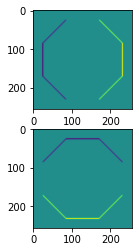

In [9]:
# Compute x, y gradients
gx = cv2.Sobel(img, -1, dx=1, dy=0)
gy = cv2.Sobel(img, -1, dx=0, dy=1)
fig,ax = plt.subplots(2,1)
ax[0].imshow(gx)
ax[1].imshow(gy)

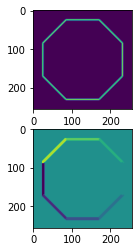

In [10]:
gmag = np.sqrt(gx**2 + gy**2)

# The minus sign here is used based on how imgradient is implemented in octave
# See https://sourceforge.net/p/octave/image/ci/default/tree/inst/imgradient.m#l61
gdir = np.arctan2(-gy, gx) * 180 / np.pi
fig, ax = plt.subplots(2,1)
ax[0].imshow(gmag / (4 * np.sqrt(2)))
ax[1].imshow(normalize(gdir).astype(np.uint8))

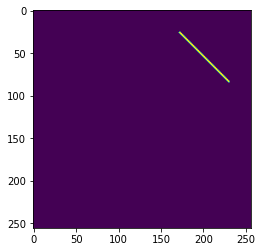

In [11]:
# Find pixels with desired gradient direction
my_grad = select_gdir(gmag, gdir, 1, 30, 60)
plt.imshow(my_grad)

# HW 6.1

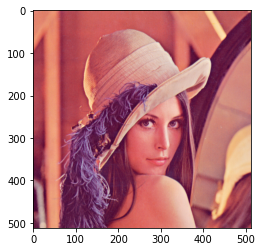

In [2]:
import cv2

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D


def surf(data: np.array):
    y = np.arange(0, data.shape[0])
    x = np.arange(0, data.shape[1])
    X, Y = np.meshgrid(x, y)

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot_surface(X, Y, data, rstride=1, cstride=1, linewidth=0,
                    cmap='jet', antialiased=False)

    plt.show(block=False)


def LoG(size: int, sigma: float): float:
    x = y = np.linspace(-size, size, 2*size+1)
    x, y = np.meshgrid(x, y)

    f = (x**2 + y**2)/(2*sigma**2)
    k = -1./(np.pi * sigma**4) * (1 - f) * np.exp(-f)

    return k


# Edge demo

# Read Lena image
lenaL = cv2.imread('images/lena.png')

lenaL =  cv2.cvtColor(lenaL, cv2.COLOR_BGR2RGB)
plt.imshow(lenaL)

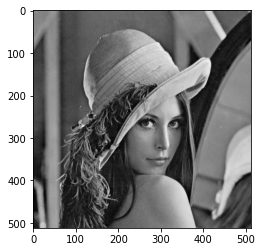

In [3]:
# Convert to monochrome (grayscale) using BGR2GRAY.
lenaMono = cv2.cvtColor(lenaL, cv2.COLOR_BGR2GRAY)
plt.imshow(lenaMono, cmap='gray')

[[0.00225264 0.00351327 0.00490316 0.0061233  0.00693861 0.00693861
  0.0061233  0.00490316 0.00351327 0.00225264]
 [0.00351327 0.00547937 0.00764708 0.00955005 0.01082162 0.01082162
  0.00955005 0.00764708 0.00547937 0.00351327]
 [0.00490316 0.00764708 0.01067236 0.01332817 0.01510279 0.01510279
  0.01332817 0.01067236 0.00764708 0.00490316]
 [0.0061233  0.00955005 0.01332817 0.01664487 0.01886111 0.01886111
  0.01664487 0.01332817 0.00955005 0.0061233 ]
 [0.00693861 0.01082162 0.01510279 0.01886111 0.02137243 0.02137243
  0.01886111 0.01510279 0.01082162 0.00693861]
 [0.00693861 0.01082162 0.01510279 0.01886111 0.02137243 0.02137243
  0.01886111 0.01510279 0.01082162 0.00693861]
 [0.0061233  0.00955005 0.01332817 0.01664487 0.01886111 0.01886111
  0.01664487 0.01332817 0.00955005 0.0061233 ]
 [0.00490316 0.00764708 0.01067236 0.01332817 0.01510279 0.01510279
  0.01332817 0.01067236 0.00764708 0.00490316]
 [0.00351327 0.00547937 0.00764708 0.00955005 0.01082162 0.01082162
  0.00955005

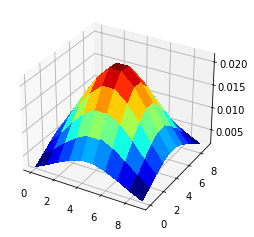

In [6]:
# Make a blurred/smoothed version. Use cv2.getGaussianKernel to get the h kernel
h = cv2.getGaussianKernel(10, 3)
h = h*h.T

print(h)

# Mimic Matlab's surf(h)
surf(h)

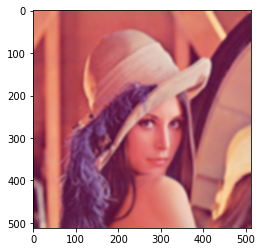

In [10]:
# Use cv2.filter2D with BORDER_CONSTANT to get results similar to the Matlab demo
lenaSmooth = cv2.filter2D(lenaL, -1, h)
plt.imshow(lenaSmooth, cmap='gray')

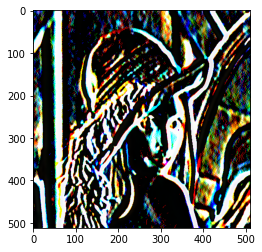

In [17]:
shift_by = 1
# Method 1: Shift left and right, and show diff image
lenaL = np.copy(lenaSmooth)  # Let's use np.copy to avoid modifying the original array
# TODO: use numpy indexing to copy and paste the array to the right position
lenaL = lenaL[:, :lenaSmooth.shape[1] - shift_by]

lenaR = np.copy(lenaSmooth)  # Let's use np.copy to avoid modifying the original array
# TODO: use numpy indexing to copy and paste the array to the right position
lenaR = lenaR[:, shift_by:]

# TODO: Subtract lenaL from lenaR. Don't forget about using the correct data type
lenaDiff = lenaR - lenaL

# Here we shift the value range to fit [0, 255] and make sure the data type is uint8 in order to display the results.
lenaDiff = cv2.normalize(lenaDiff, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
plt.imshow(lenaDiff.astype(np.uint8))

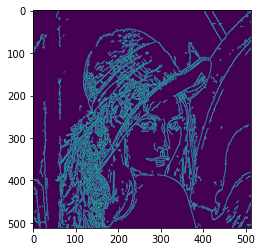

In [19]:
# Method 2: Canny edge detector
# OpenCV doesn't have a function similar to edge but it does have a Canny Edge detector
# OpenCV needs you to specify low and high threshold values. While these are not the
# exactly the same as the ones used in the demo you should refer to the lines below
# as a reference on how cv2.Canny works
thresh1 = 110
thresh2 = 60

cannyEdges = cv2.Canny(lenaMono, thresh1, thresh2)  # TODO: use cv2.Canny with lenaMono and the thresholds defined above
plt.imshow(cannyEdges)

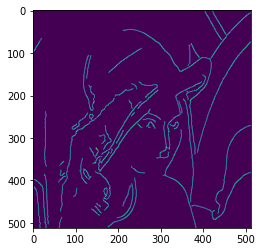

In [20]:
cannyEdges = cv2.Canny(lenaSmooth, thresh1, thresh2)  # TODO: use cv2.Canny with lenaSmooth and the thresholds defined above
plt.imshow(cannyEdges)

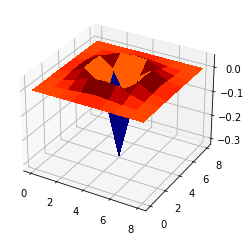

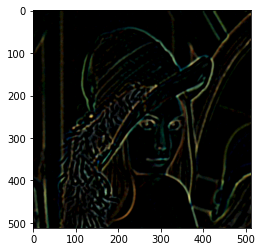

In [22]:
# Method 3: Laplacian of Gaussian
h = LoG(4, 1.)
surf(h)

# Let's use cv2.filter2D with the new h
logEdges = cv2.filter2D(lenaSmooth, -1, h)
logEdgesShow = cv2.normalize(logEdges, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

plt.imshow(logEdgesShow.astype(np.uint8))

# HW 6.2

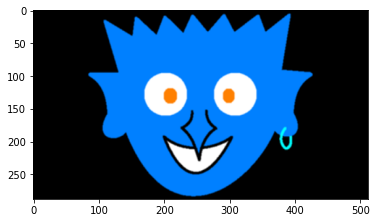

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# For Your Eyes Only
frizzy = cv2.imread('images/frizzy.png')
froomer = cv2.imread('images/froomer.png')
plt.imshow(frizzy)

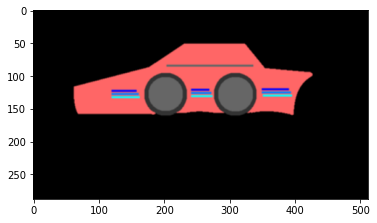

In [4]:
plt.imshow(froomer)

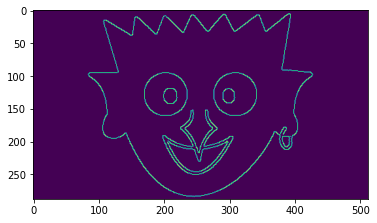

In [10]:
plt.imshow(frizzy_edge)

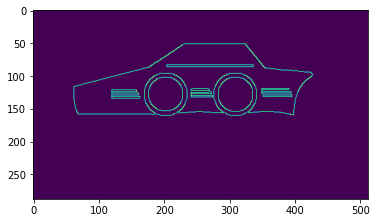

In [15]:
plt.imshow(froomer_edge)

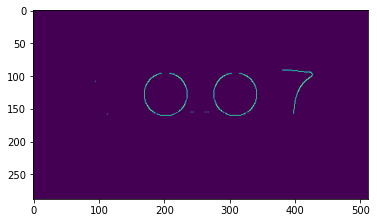

In [31]:
# TODO: Find edges in frizzy and froomer images
frizzy_edge = cv2.Canny(frizzy, 110, 60)
froomer_edge = cv2.Canny(froomer, 110, 60)
# TODO: Display common edge pixels
plt.imshow(((frizzy_edge & froomer_edge) * 255.).astype(np.uint8))

# HW 7

In [41]:
import cv2
import numpy as np

# Project a point from 3D to 2D using a matrix operation

# Given: Point p in 3-space [x y z], and focal length f
# Return: Location of projected point on 2D image plane [u v]


def project_point(p: np.array, f: int) -> np.array:
    projection_matrix = np.array([
        [f, 0, 0, 0],
        [0, f, 0, 0],
        [0, 0, 0, 1]
    ])
    p = np.concatenate((p, np.zeros((1,1))),1).T
    return np.dot(projection_matrix, p).T[:,:2]

# Test: Given point and focal length (units: mm)
p = np.array([[200, 100, 120]])
f = 50

print (project_point(p, f))

[[10000.  5000.]]


# HW 8.1

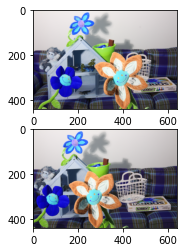

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Find best match
def find_best_match(patch: np.array, strip: np.array) -> int:
    diffs = []
    for i in range(strip.shape[1] - patch.shape[1]):
        diffs.append(np.sum((strip[:, i:i+patch.shape[1]] - patch)**2))
    return np.argmin(np.array(diffs))

# Test code:

# Load images
left = cv2.imread('images/flowers-left.png')
right = cv2.imread('images/flowers-right.png')
fig,ax = plt.subplots(2,1)
ax[0].imshow(left)
ax[1].imshow(right)

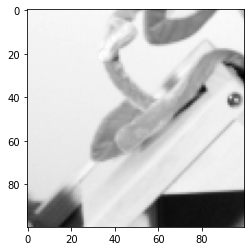

In [97]:
# Convert to grayscale, double, [0, 1] range for easier computation
left_gray = cv2.cvtColor(left, cv2.COLOR_BGR2GRAY) / 255.
right_gray = cv2.cvtColor(right, cv2.COLOR_BGR2GRAY) / 255.

# Define image patch location (topleft [row col]) and size
patch_loc = [94, 119]  # Adapted index values to approximate the difference with the original images shapes
patch_size = [100, 100]

# Extract patch (from left image)
patch_left = left_gray[patch_loc[0]:patch_loc[0] + patch_size[0],
                       patch_loc[1]:patch_loc[1] + patch_size[1]]
plt.imshow(patch_left, cmap='gray')

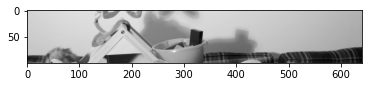

In [98]:
# Extract strip (from right image)
strip_right = right_gray[patch_loc[0]: patch_loc[0] + patch_size[0], :]
plt.imshow(strip_right, cmap='gray')

In [99]:
# Now look for the patch in the strip and report the best position (column index of topleft corner)
best_x = find_best_match(patch_left, strip_right)
print( best_x)

patch_right = right_gray[patch_loc[0]: patch_loc[0] + patch_size[0],
                         best_x: best_x + patch_size[1]]


92


# HW 8.2

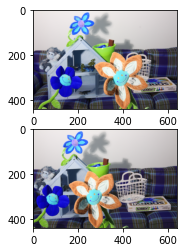

In [109]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# We will use the function implemented in the last quiz
# Find best match
def find_best_match(patch: np.array, strip: np.array) -> int:
    diffs = []
    for i in range(strip.shape[1] - patch.shape[1]):
        diffs.append(np.sum((strip[:, i:i+patch.shape[1]] - patch)**2))
    return np.argmin(np.array(diffs))


def match_strips(strip_left: np.array, strip_right: np.array, b: int) -> np.array:
    # For each non-overlapping patch/block of width b in the left strip,
    # find the best matching position (along X-axis) in the right strip.
    # Return a vector of disparities (left X-position - right X-position).
    # Note: Only consider whole blocks that fit within image bounds.
    disp = []
    for i in range(0, strip_left.shape[1] - b, b):
        patch = strip_left[:, i:i+b]
        best_x = find_best_match(patch, strip_right)
        disp.append(i - best_x)
    return np.array(disp)

# Test code:

# Load images
left = cv2.imread('images/flowers-left.png')
right = cv2.imread('images/flowers-right.png')
fig, ax = plt.subplots(2,1)
ax[0].imshow(left)
ax[1].imshow(right)

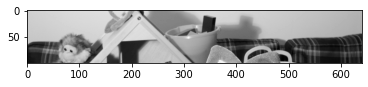

In [110]:
# Convert to grayscale, double, [0, 1] range for easier computation
left_gray = cv2.cvtColor(left, cv2.COLOR_BGR2GRAY) / 255.
right_gray = cv2.cvtColor(right, cv2.COLOR_BGR2GRAY) / 255.

# Define strip row (y) and square block size (b)
y = 120
b = 100

# Extract strip from left image
strip_left = left_gray[y: y + b, :]
plt.imshow(strip_left, cmap='gray')

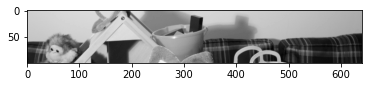

In [111]:
# Extract strip from right image
strip_right = right_gray[y: y + b, :]
plt.imshow(strip_right, cmap='gray')

[ 0 26 21 25 19 21]


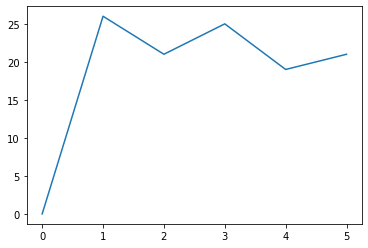

In [113]:
# Now match these two strips to compute disparity values
disparity = match_strips(strip_left, strip_right, b)
print( disparity)

# Finally we plot the disparity values. Note that there may be some differences
# in the results shown in the quiz because we had to adapt the index values.
plt.plot(range(disparity.shape[0]), disparity)
plt.show()

# HW 9

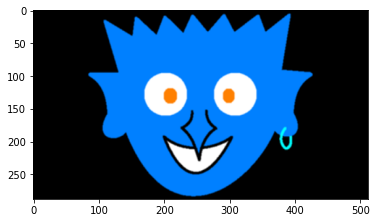

In [127]:
import cv2


def downsample(img: np.array) -> np.array:
    return img[np.arange(1, img.shape[0], 2)]


def blur_downsample(img: np.array) -> np.array:
    h = cv2.getGaussianKernel(3, 1)
    h = h*h.T
    gauss = cv2.filter2D(img, -1, h)
    downsampled = downsample(gauss)
    return downsampled

img = cv2.imread('images/frizzy.png')
plt.imshow(img)

In [128]:
print(img.shape)

# downsample image
img_d = downsample(img)
img_d = downsample(img_d)
img_d = downsample(img_d)
print(img_d.shape)

# blur and downsample
img_bd = blur_downsample(img)
img_bd = blur_downsample(img_bd)
img_bd = blur_downsample(img_bd)
print(img_bd.shape)

(288, 512, 3)
(36, 512, 3)
(36, 512, 3)


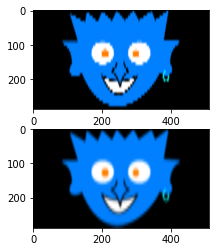

In [129]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(cv2.resize(img_d, (img.shape[1], img.shape[0])))
ax[1].imshow(cv2.resize(img_bd, (img.shape[1], img.shape[0])))

# HW 10

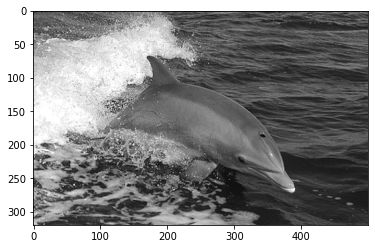

In [132]:
import cv2
import numpy as np


def compute_integral(img: np.array) -> np.array:
    # TODO: Compute I such that I(y,x) = sum of img(1,1) to img(y,x)
    integral = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            integral[i,j] = np.sum(img[:i,:j])
    return integral


img = cv2.imread('images/dolphin.png', 0)
plt.imshow(img, cmap='gray')

(320, 500)
Sum:  2102331.0
2100678.0


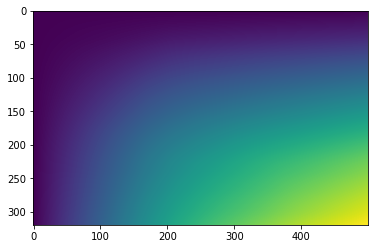

In [135]:
print(img.shape)

# compute integral
img = np.float64(img)
I = compute_integral(img)
plt.imshow(I / I.max())

x1 = 150
y1 = 100
x2 = 350
y2 = 200

print("Sum: ", np.sum(img[y1:y2 + 1, x1:x2 + 1]))
print(I[y2, x2] - I[y1 - 1, x2] - I[y2, x1 - 1] + I[y1 - 1, x1 - 1])
